liesel.goose.builder - WARNING - No jitter functions provided. The initial values won't be jittered
liesel.goose.engine - INFO - Initializing kernels...
liesel.goose.engine - INFO - Done
liesel.goose.engine - INFO - Starting epoch: FAST_ADAPTATION, 75 transitions, 25 jitted together
100%|██████████████████████████████████████████| 3/3 [00:06<00:00,  2.20s/chunk]
liesel.goose.engine - WARNING - Errors per chain for kernel_00: 1, 1, 1, 1 / 75 transitions
liesel.goose.engine - WARNING - Errors per chain for kernel_02: 1, 1, 1, 1 / 75 transitions
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 25 transitions, 25 jitted together
100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 978.38chunk/s]
liesel.goose.engine - WARNING - Errors per chain for kernel_00: 1, 1, 1, 1 / 25 transitions
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 125 transitions, 25 jitted toge

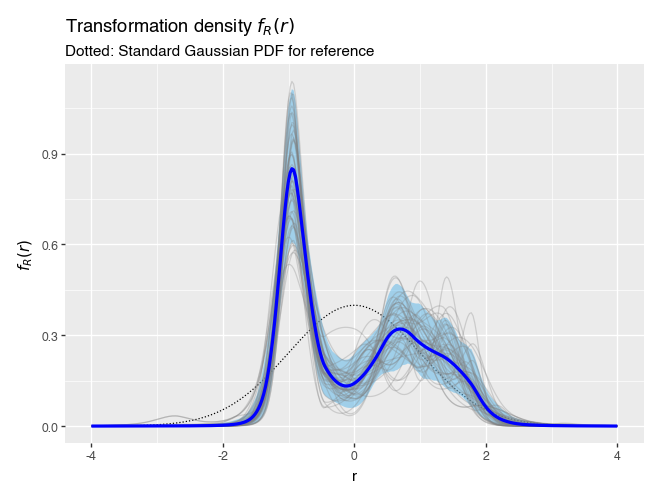

In [ ]:
from jax.random import key, normal, split, uniform

import liesel_ptm as ptm
from liesel_ptm import plot_term, ps, term

k = key(0)
k, sk = split(k)
x = uniform(k, (100,), minval=-2.0, maxval=2.0)

# create a bimodal density
r = normal(sk, (100,))
r = r.at[:50].set(r[:50] + 2.0)
r = r.at[50:].set(0.5 * r[50:] - 2.0)

y = ptm.util.SimFunctions.f3_oscillating(x) + r

model = ptm.LocScalePTM.new_ptm(y)

model.loc += term.f_ig(ps(x, nbases=20, xname="x"))

results = model.run_mcmc(seed=1, warmup=300, posterior=500)
samples = results.get_posterior_samples()

model.plot_r_density(samples)

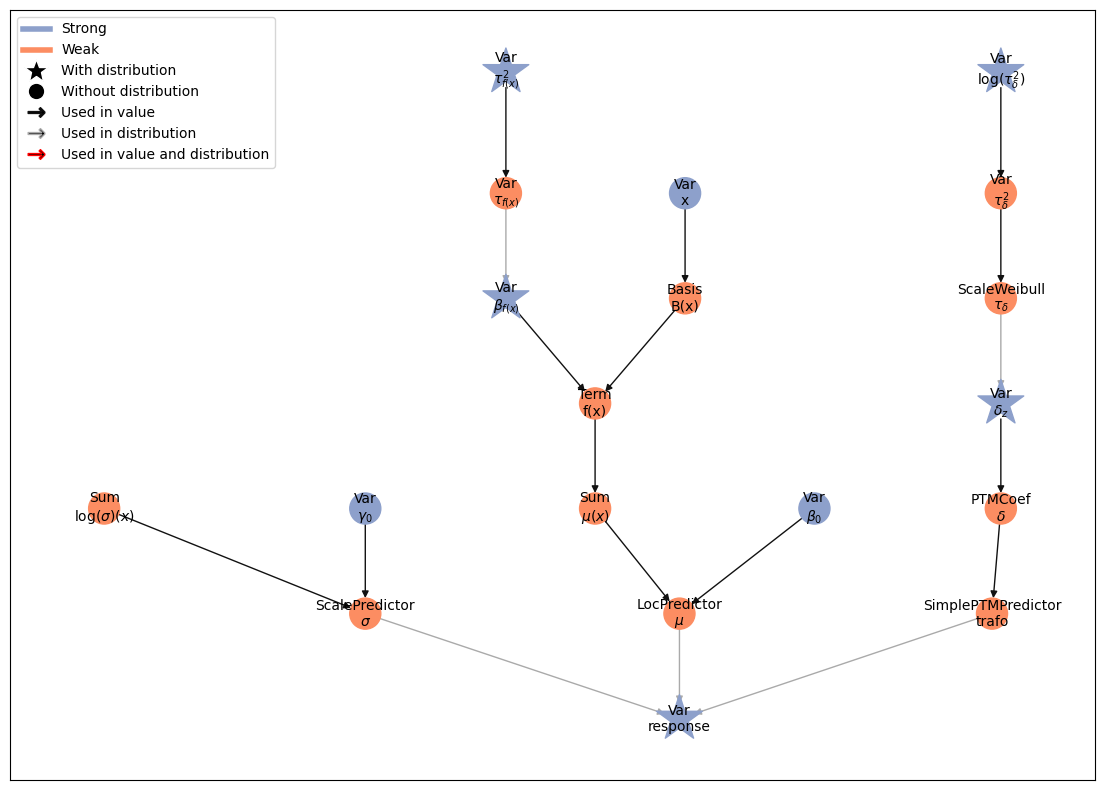

In [11]:
model.graph.plot_vars()

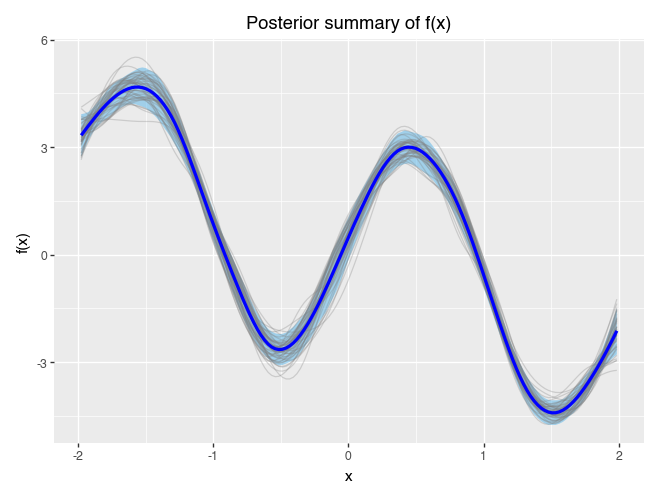

In [12]:
plot_term(model.loc.terms["f(x)"], samples)